## Imports

In [68]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
import pandas as pd

## Data Prep

In [69]:
df = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/K85_Cohort/albumin_cleaned_for_psm_1.csv')

In [70]:
df.drop(columns=['diuretic'], inplace=True)

In [71]:
df.shape

(217649, 14)

In [72]:
df.albumin_24hrs.value_counts()

0    214490
1      3159
Name: albumin_24hrs, dtype: int64

In [73]:
#df.drop(columns = ['bl_albumin_value', 'albumin_lab_baseline_severity'], inplace=True)

In [74]:
df.head()

personid                           encounterid  \
0  00b9e4f1-0372-47b9-bae1-31359b9efedd  69ded17f-13c0-46f3-afb2-6134532154fa   
1  04dc586c-b3a5-4b1e-aeae-5e88f59c8bf2  a3b6de33-e535-4631-816a-08e6c4a30d0a   
2  07fac8e2-c0ab-4d96-b374-6bbfbc866712  fafe0164-b7f1-4cba-9d6b-b259c3cb91e0   
3  2d18c800-a846-42be-831d-e38e23aaa66d  22fe93b9-e153-4f04-b659-a892b5b42764   
4  311debc2-2a63-4e0b-bb61-65eeae1ba941  3fdd2906-68f9-4c83-bfa3-2b270d4fc880   

   ICU   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
0    0  21.559722                 1                 0.0                   0   
1    0  33.963889                 0                 1.0                  43   
2    0   6.509028                 0                 0.0                  83   
3    0  19.410417                 1                 0.0                   0   
4    1   8.526227                 0                 0.0                  82   

   Cirrhosis  CCI  qSOFA  albumin_timing  SEWS  albumin  albumin_24hrs  
0          0    4      0             0.0     0        1              0  
1          1    5      1             0.0     1        1              0  
2          0    3      1             0.0     3        1              0  
3          0    5      0             0.0     0        1              0  
4          0    0      0             0.0     0        1              0

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217649 entries, 0 to 217648
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   personid            217649 non-null  object 
 1   encounterid         217649 non-null  object 
 2   ICU                 217649 non-null  int64  
 3   LOS_days            217649 non-null  float64
 4   90_day_mortality    217649 non-null  int64  
 5   90_day_readmission  217649 non-null  float64
 6   hospital_free_days  217649 non-null  int64  
 7   Cirrhosis           217649 non-null  int64  
 8   CCI                 217649 non-null  int64  
 9   qSOFA               217649 non-null  int64  
 10  albumin_timing      217649 non-null  float64
 11  SEWS                217649 non-null  int64  
 12  albumin             217649 non-null  int64  
 13  albumin_24hrs       217649 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 23.2+ MB


## Look at outcomes distributions between patients who did and didn't receive albumin within 24 hrs

In [76]:
df[df['albumin_24hrs'] == 1].LOS_days.describe()

count    3159.000000
mean       11.544970
std        10.512175
min         0.054167
25%         4.094792
50%         8.156944
75%        15.551962
max        53.249722
Name: LOS_days, dtype: float64

In [77]:
df[df['albumin_24hrs'] == 0].LOS_days.describe()

count    214490.000000
mean          3.666293
std           5.190554
min           0.000000
25%           0.486806
50%           2.273611
75%           4.479861
max          53.372222
Name: LOS_days, dtype: float64

In [78]:
df[df['albumin_24hrs'] == 1]['90_day_mortality'].value_counts()

0    2421
1     738
Name: 90_day_mortality, dtype: int64

In [79]:
df[df['albumin_24hrs'] == 0]['90_day_mortality'].value_counts()

0    209310
1      5180
Name: 90_day_mortality, dtype: int64

In [80]:
df[df['albumin_24hrs'] == 1]['90_day_readmission'].value_counts()

0.0    2197
1.0     962
Name: 90_day_readmission, dtype: int64

In [81]:
df[df['albumin_24hrs'] == 0]['90_day_readmission'].value_counts()

0.0    150403
1.0     64087
Name: 90_day_readmission, dtype: int64

In [83]:
df.head()

personid                           encounterid  \
0  00b9e4f1-0372-47b9-bae1-31359b9efedd  69ded17f-13c0-46f3-afb2-6134532154fa   
1  04dc586c-b3a5-4b1e-aeae-5e88f59c8bf2  a3b6de33-e535-4631-816a-08e6c4a30d0a   
2  07fac8e2-c0ab-4d96-b374-6bbfbc866712  fafe0164-b7f1-4cba-9d6b-b259c3cb91e0   
3  2d18c800-a846-42be-831d-e38e23aaa66d  22fe93b9-e153-4f04-b659-a892b5b42764   
4  311debc2-2a63-4e0b-bb61-65eeae1ba941  3fdd2906-68f9-4c83-bfa3-2b270d4fc880   

   ICU   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
0    0  21.559722                 1                 0.0                   0   
1    0  33.963889                 0                 1.0                  43   
2    0   6.509028                 0                 0.0                  83   
3    0  19.410417                 1                 0.0                   0   
4    1   8.526227                 0                 0.0                  82   

   Cirrhosis  CCI  qSOFA  albumin_timing  SEWS  albumin  albumin_24hrs  
0          0    4      0             0.0     0        1              0  
1          1    5      1             0.0     1        1              0  
2          0    3      1             0.0     3        1              0  
3          0    5      0             0.0     0        1              0  
4          0    0      0             0.0     0        1              0

In [84]:
# df.drop(columns=['90_day_mortality'], inplace=True)

In [85]:
df.head()

personid                           encounterid  \
0  00b9e4f1-0372-47b9-bae1-31359b9efedd  69ded17f-13c0-46f3-afb2-6134532154fa   
1  04dc586c-b3a5-4b1e-aeae-5e88f59c8bf2  a3b6de33-e535-4631-816a-08e6c4a30d0a   
2  07fac8e2-c0ab-4d96-b374-6bbfbc866712  fafe0164-b7f1-4cba-9d6b-b259c3cb91e0   
3  2d18c800-a846-42be-831d-e38e23aaa66d  22fe93b9-e153-4f04-b659-a892b5b42764   
4  311debc2-2a63-4e0b-bb61-65eeae1ba941  3fdd2906-68f9-4c83-bfa3-2b270d4fc880   

   ICU   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
0    0  21.559722                 1                 0.0                   0   
1    0  33.963889                 0                 1.0                  43   
2    0   6.509028                 0                 0.0                  83   
3    0  19.410417                 1                 0.0                   0   
4    1   8.526227                 0                 0.0                  82   

   Cirrhosis  CCI  qSOFA  albumin_timing  SEWS  albumin  albumin_24hrs  
0          0    4      0             0.0     0        1              0  
1          1    5      1             0.0     1        1              0  
2          0    3      1             0.0     3        1              0  
3          0    5      0             0.0     0        1              0  
4          0    0      0             0.0     0        1              0

In [86]:
df_a24 = df[['personid', 'encounterid', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'albumin_timing', 'albumin']]

In [87]:
df_a24.head()

personid                           encounterid  \
0  00b9e4f1-0372-47b9-bae1-31359b9efedd  69ded17f-13c0-46f3-afb2-6134532154fa   
1  04dc586c-b3a5-4b1e-aeae-5e88f59c8bf2  a3b6de33-e535-4631-816a-08e6c4a30d0a   
2  07fac8e2-c0ab-4d96-b374-6bbfbc866712  fafe0164-b7f1-4cba-9d6b-b259c3cb91e0   
3  2d18c800-a846-42be-831d-e38e23aaa66d  22fe93b9-e153-4f04-b659-a892b5b42764   
4  311debc2-2a63-4e0b-bb61-65eeae1ba941  3fdd2906-68f9-4c83-bfa3-2b270d4fc880   

    LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
0  21.559722                 1                 0.0                   0   
1  33.963889                 0                 1.0                  43   
2   6.509028                 0                 0.0                  83   
3  19.410417                 1                 0.0                   0   
4   8.526227                 0                 0.0                  82   

   albumin_timing  albumin  
0             0.0        1  
1             0.0        1  
2             0.0        1  
3             0.0        1  
4             0.0        1

In [88]:
#df.drop(columns=['personid', 'encounterid', 'albumin_24'], inplace=True)

In [89]:
df.shape

(217649, 14)

In [90]:
df.head()

personid                           encounterid  \
0  00b9e4f1-0372-47b9-bae1-31359b9efedd  69ded17f-13c0-46f3-afb2-6134532154fa   
1  04dc586c-b3a5-4b1e-aeae-5e88f59c8bf2  a3b6de33-e535-4631-816a-08e6c4a30d0a   
2  07fac8e2-c0ab-4d96-b374-6bbfbc866712  fafe0164-b7f1-4cba-9d6b-b259c3cb91e0   
3  2d18c800-a846-42be-831d-e38e23aaa66d  22fe93b9-e153-4f04-b659-a892b5b42764   
4  311debc2-2a63-4e0b-bb61-65eeae1ba941  3fdd2906-68f9-4c83-bfa3-2b270d4fc880   

   ICU   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
0    0  21.559722                 1                 0.0                   0   
1    0  33.963889                 0                 1.0                  43   
2    0   6.509028                 0                 0.0                  83   
3    0  19.410417                 1                 0.0                   0   
4    1   8.526227                 0                 0.0                  82   

   Cirrhosis  CCI  qSOFA  albumin_timing  SEWS  albumin  albumin_24hrs  
0          0    4      0             0.0     0        1              0  
1          1    5      1             0.0     1        1              0  
2          0    3      1             0.0     3        1              0  
3          0    5      0             0.0     0        1              0  
4          0    0      0             0.0     0        1              0

## Initialize PsmPy Class

In [91]:
psm = PsmPy(df, treatment= 'albumin_24hrs', indx='encounterid', exclude = ['personid', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'albumin_timing', 'albumin'])

In [92]:
%%time
psm.logistic_ps(balance = True)

Wall time: 2min


In [93]:
df_psm = psm.predicted_data

In [94]:
df_psm.head()

encounterid  ICU  Cirrhosis  CCI  qSOFA  SEWS  \
0  06a78daa-d369-4af6-baa9-bb081f9ae6eb    0          1    1      0     0   
1  af2557de-fa1a-4652-8a59-2fcfad3ce4a1    1          0    1      1     3   
2  611d8627-bdd7-4b7f-a849-9350bf32a088    1          1    4      2     5   
3  058e7714-06bc-4c29-bf02-79e654d0f5c9    1          1    1      1     3   
4  acf2ebaa-eca0-48db-b5a3-19dc2c8f2adc    0          0    0      0     0   

   propensity_score  propensity_logit  albumin_24hrs  
0          0.523465          0.093929              1  
1          0.890731          2.098225              1  
2          0.990139          4.609295              1  
3          0.972208          3.554838              1  
4          0.117482         -2.016495              1

## Plot the propensity score / propensity logits

In [95]:
%%time
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Wall time: 3h 45min 35s


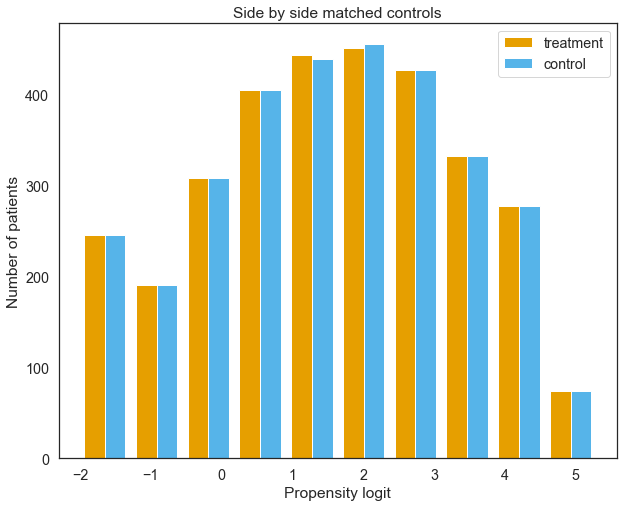

In [96]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], save=True)

## Plot the effect sizes

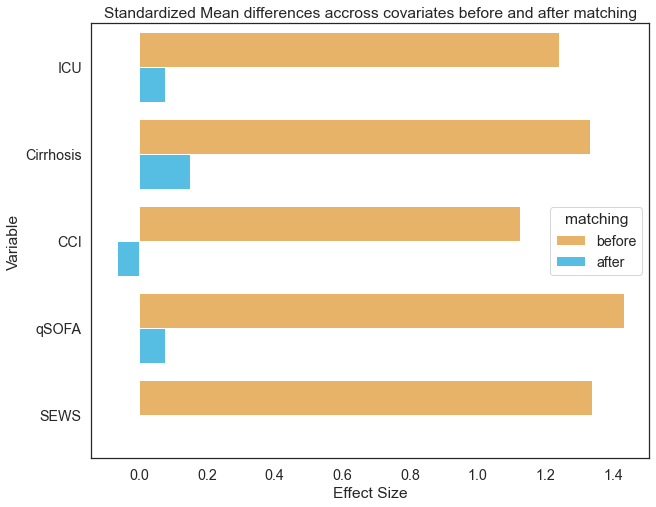

In [97]:
psm.effect_size_plot(save=False)

## Raw Dataframe

In [98]:
matched_df = psm.df_matched

In [99]:
matched_df.head()

encounterid  ICU  Cirrhosis  CCI  qSOFA  SEWS  \
0  06a78daa-d369-4af6-baa9-bb081f9ae6eb    0          1    1      0     0   
1  af2557de-fa1a-4652-8a59-2fcfad3ce4a1    1          0    1      1     3   
2  611d8627-bdd7-4b7f-a849-9350bf32a088    1          1    4      2     5   
3  058e7714-06bc-4c29-bf02-79e654d0f5c9    1          1    1      1     3   
4  acf2ebaa-eca0-48db-b5a3-19dc2c8f2adc    0          0    0      0     0   

   propensity_score  propensity_logit  albumin_24hrs  
0          0.523465          0.093929              1  
1          0.890731          2.098225              1  
2          0.990139          4.609295              1  
3          0.972208          3.554838              1  
4          0.117482         -2.016495              1

In [100]:
matched_df.shape

(6318, 9)

## Matched Ids

In [101]:
ids_df = psm.matched_ids
ids_df.head()

encounterid                            matched_ID
0  06a78daa-d369-4af6-baa9-bb081f9ae6eb  f1dbf4a6-51c0-4e80-a55e-52ed40aee52d
1  af2557de-fa1a-4652-8a59-2fcfad3ce4a1  4da08f4b-c517-4858-90fe-36f5129ed3cd
2  611d8627-bdd7-4b7f-a849-9350bf32a088  f0b0db0f-c901-4881-b51f-1f67ea7b3478
3  058e7714-06bc-4c29-bf02-79e654d0f5c9  4c1e3eb5-0f79-48c3-a244-5750c7b78ddb
4  acf2ebaa-eca0-48db-b5a3-19dc2c8f2adc  ea698eb7-3ee3-46bc-a4ca-7919b3e2e2b8

## Effect sizes per variables

In [102]:
psm.effect_size

Variable matching  Effect Size
0        ICU   before     1.239931
1        ICU    after     0.076161
2  Cirrhosis   before     1.331847
3  Cirrhosis    after     0.150709
4        CCI   before     1.122826
5        CCI    after    -0.066555
6      qSOFA   before     1.431179
7      qSOFA    after     0.075312
8       SEWS   before     1.337723
9       SEWS    after    -0.003237

## Explore Matched df

In [103]:
matched_df.head()

encounterid  ICU  Cirrhosis  CCI  qSOFA  SEWS  \
0  06a78daa-d369-4af6-baa9-bb081f9ae6eb    0          1    1      0     0   
1  af2557de-fa1a-4652-8a59-2fcfad3ce4a1    1          0    1      1     3   
2  611d8627-bdd7-4b7f-a849-9350bf32a088    1          1    4      2     5   
3  058e7714-06bc-4c29-bf02-79e654d0f5c9    1          1    1      1     3   
4  acf2ebaa-eca0-48db-b5a3-19dc2c8f2adc    0          0    0      0     0   

   propensity_score  propensity_logit  albumin_24hrs  
0          0.523465          0.093929              1  
1          0.890731          2.098225              1  
2          0.990139          4.609295              1  
3          0.972208          3.554838              1  
4          0.117482         -2.016495              1

In [104]:
matched_df.albumin_24hrs.value_counts()

1    3159
0    3159
Name: albumin_24hrs, dtype: int64

In [105]:
matched_df.shape

(6318, 9)

## Join Matched df with earlier df on encounterid to add outcome variables

In [106]:
f_df = matched_df.merge(df_a24, on='encounterid', how='left')

In [107]:
f_df.shape

(6318, 16)

In [108]:
f_df.head()

encounterid  ICU  Cirrhosis  CCI  qSOFA  SEWS  \
0  06a78daa-d369-4af6-baa9-bb081f9ae6eb    0          1    1      0     0   
1  af2557de-fa1a-4652-8a59-2fcfad3ce4a1    1          0    1      1     3   
2  611d8627-bdd7-4b7f-a849-9350bf32a088    1          1    4      2     5   
3  058e7714-06bc-4c29-bf02-79e654d0f5c9    1          1    1      1     3   
4  acf2ebaa-eca0-48db-b5a3-19dc2c8f2adc    0          0    0      0     0   

   propensity_score  propensity_logit  albumin_24hrs  \
0          0.523465          0.093929              1   
1          0.890731          2.098225              1   
2          0.990139          4.609295              1   
3          0.972208          3.554838              1   
4          0.117482         -2.016495              1   

                               personid   LOS_days  90_day_mortality  \
0  35fe0efc-bab7-4f2a-830a-f24f904d1440   6.805556                 0   
1  42f14dab-4f7b-416e-8fe7-5fcc16a139ee   9.620139                 0   
2  51ac0f16-8351-4a56-a08f-9c04af96fd3f   1.940972                 1   
3  574c98e8-d7ae-480d-81d0-41f142064aba  21.387500                 0   
4  5dbb63a3-5fcd-4899-8019-d5eca74d232e   5.479167                 0   

   90_day_readmission  hospital_free_days  albumin_timing  albumin  
0                 1.0                   7             1.0        1  
1                 1.0                  35             2.0        1  
2                 0.0                   0             1.0        1  
3                 1.0                  38             1.0        1  
4                 0.0                  21             1.0        1

In [109]:
f_df.to_csv('K85_matched_1.csv', index=False)